In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from tabulate import tabulate
import numpy as np
import seaborn as sns
import time

C:\Users\rafae\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#imports 2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score


### Funções

In [3]:
#FUNÇÃO PARA RECEBER INTERVALOS
def definir_bins(*args):
    
    return bins

#FUNÇÃO PARA RECEBER OS VALORES DAS COLUNAS
def setar_valores_da_lista(*args):
    
    return valores

#FUNÇÃO PARA SUBSTITUIR OS REGISTROS DAS COLUNAS E DIMINUIR O TOTAL DO "value_counts"
def processar_coluna(df, nome_coluna):
    df[nome_coluna] = df[nome_coluna].astype(float) 
    bins = definir_bins()  
    valores = setar_valores_da_lista()
    df[nome_coluna] = pd.cut(df[nome_coluna], bins=bins, labels=valores) 
    return df




In [87]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_valores(df, nome_coluna):
        
    # Calcula o número de valores nulos em cada coluna
    registros_salario = df[nome_coluna].value_counts()
    
    # Filtra as colunas com mais de 3000 valores nulos
    registros_under_500 = registros_salario[registros_salario > 50]
    
    # Exibe o total de valores nulos para as colunas que têm mais de 500 valores nulos
    print("Total de valores nulos para as colunas com mais de 500 valores nulos:")
    print(registros_under_500)




In [5]:
#FUNÇÃO DE SUBSTITUIÇÃO DE VALORES NULOS
def valor_nulo_proporcao(df, nome_coluna):
    # Substituindo os valores nulos de acordo com as proporções
    null_indices = df[nome_coluna].isnull()
    for value, proportion in replacement_values.items():
        num_to_replace = int(null_indices.sum() * proportion)
        if num_to_replace > 0:
            replace_indices = np.random.choice(null_indices.index[null_indices], num_to_replace, replace=False)
            df.loc[replace_indices, nome_coluna] = value
    return df        

In [6]:
#função para exibir o valor de valores nulos em cada coluna
def exibir_colunas_com_valores_nulos(df):
        
    # Calcula o número de valores nulos em cada coluna
    valores_nulos_por_coluna = df.isnull().sum()
    
    # Filtra as colunas com mais de 3000 valores nulos
    colunas_com_menos_de_700_nulos = valores_nulos_por_coluna[valores_nulos_por_coluna > 1]
    
    # Exibe o total de valores nulos para as colunas que têm mais de 3000 valores nulos
    print("Total de valores nulos para as colunas com valores nulos:")
    print(colunas_com_menos_de_700_nulos)



In [7]:
def plotar_distribuicao_percentual(df, coluna):
    # Calcula a distribuição percentual de cada valor na coluna especificada
    distribuicao = df[coluna].value_counts(normalize=True) * 100
    
    # Plota o gráfico da distribuição percentual
    distribuicao.plot(kind='bar')
    plt.title(f'Distribuição Percentual da Coluna {coluna}')
    plt.xlabel('Valores')
    plt.ylabel('Porcentagem')
    plt.show()

### Importando a Base

In [8]:
df = pd.read_csv("base_balanceada")

In [9]:
df

,C006,M01401,M01501,E01602,VDF001,E017,D00901,A001,A002010,A003010,...,P01601,P018,P02002,P023,P02501,P02602,P02601,E001,P050,Q092
0,2.0,3.0,3.0,20000.0,2.0,40.0,13.0,2.0,1.0,2.0,...,1.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0
1,2.0,0.0,3.0,NaN,2.0,NaN,NaN,1.0,2.0,1.0,...,4.0,4.0,0.0,0.0,0.0,0.0,4.0,2.0,3.0,1.0
2,2.0,3.0,2.0,2000.0,2.0,30.0,10.0,1.0,1.0,1.0,...,6.0,7.0,0.0,7.0,5.0,0.0,4.0,2.0,3.0,1.0
3,2.0,3.0,1.0,3001.0,2.0,50.0,12.0,2.0,1.0,3.0,...,7.0,4.0,0.0,0.0,0.0,0.0,4.0,1.0,3.0,1.0
4,2.0,3.0,2.0,NaN,2.0,NaN,10.0,1.0,1.0,1.0,...,3.0,7.0,2.0,5.0,2.0,0.0,2.0,2.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4553,2.0,1.0,2.0,998.0,2.0,36.0,10.0,1.0,2.0,3.0,...,0.0,1.0,0.0,1.0,7.0,0.0,3.0,1.0,3.0,2.0
4554,1.0,1.0,0.0,1200.0,2.0,60.0,10.0,1.0,1.0,2.0,...,4.0,1.0,0.0,0.0,7.0,0.0,4.0,1.0,3.0,2.0
4555,2.0,3.0,0.0,1200.0,2.0,48.0,10.0,1.0,1.0,1.0,...,7.0,3.0,7.0,0.0,0.0,0.0,4.0,1.0,3.0,2.0
4556,2.0,3.0,0.0,600.0,2.0,50.0,10.0,1.0,4.0,1.0,...,1.0,5.0,2.0,0.0,0.0,0.0,3.0,1.0,3.0,2.0


In [10]:
df['Q092']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4553    2.0
4554    2.0
4555    2.0
4556    2.0
4557    2.0
Name: Q092, Length: 4558, dtype: float64

### Verificando quantidade de valores nulos

In [11]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
E01602    1481
E017      1416
D00901     667
P00104     106
P00404     106
dtype: int64


In [12]:
df['E01602'].max()

60000.0

In [13]:
df['E01602'].value_counts()

E01602
998.0      294
2000.0     200
1500.0     191
1000.0     179
1200.0     178
          ... 
1384.0       1
22000.0      1
2380.0       1
2950.0       1
1152.0       1
Name: count, Length: 312, dtype: int64

### Olhando graficamente colunas especificas

In [61]:
valores_peso = df['P00104'].value_counts()

In [62]:
valores_altura = df['P00404'].value_counts()

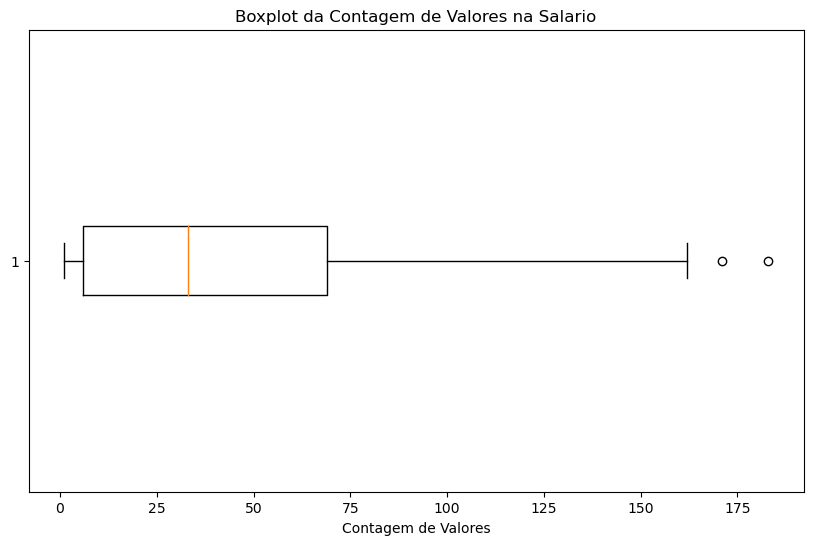

In [66]:
# Contar valores em 'E01602'
value_counts = df['E01602'].value_counts()

# Criar um boxplot para verificar outliers
plt.figure(figsize=(10, 6))
plt.boxplot(valores_peso, vert=False)

plt.xlabel('Contagem de Valores')
plt.title('Boxplot da Contagem de Valores na Salario')
plt.show()

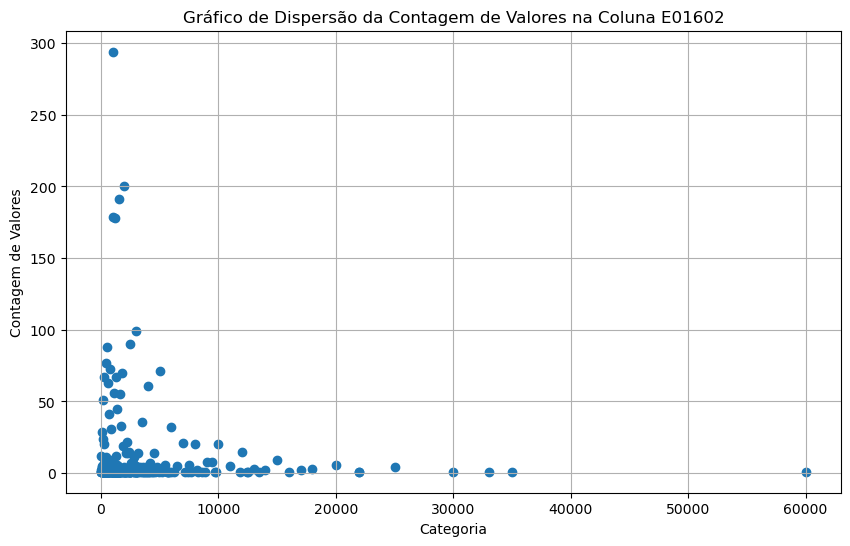

In [15]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(value_counts.index, value_counts.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores na Coluna E01602')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

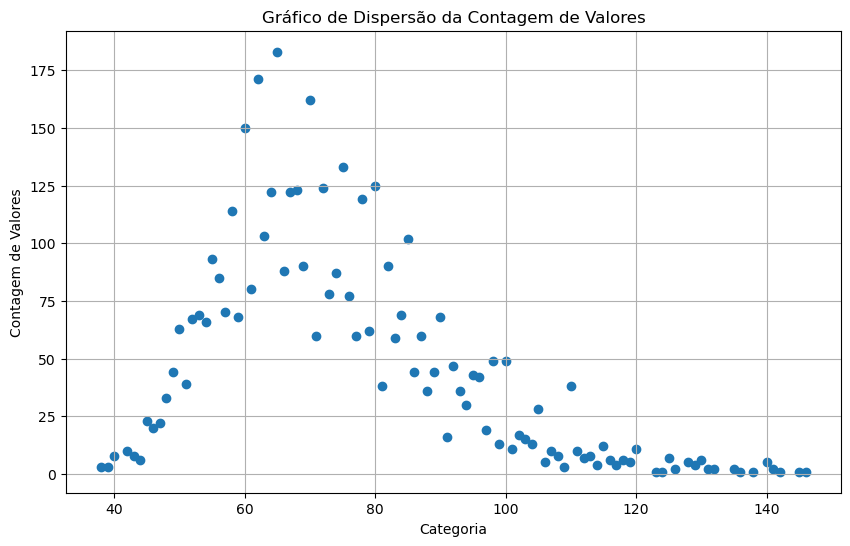

In [63]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_peso.index, valores_peso.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

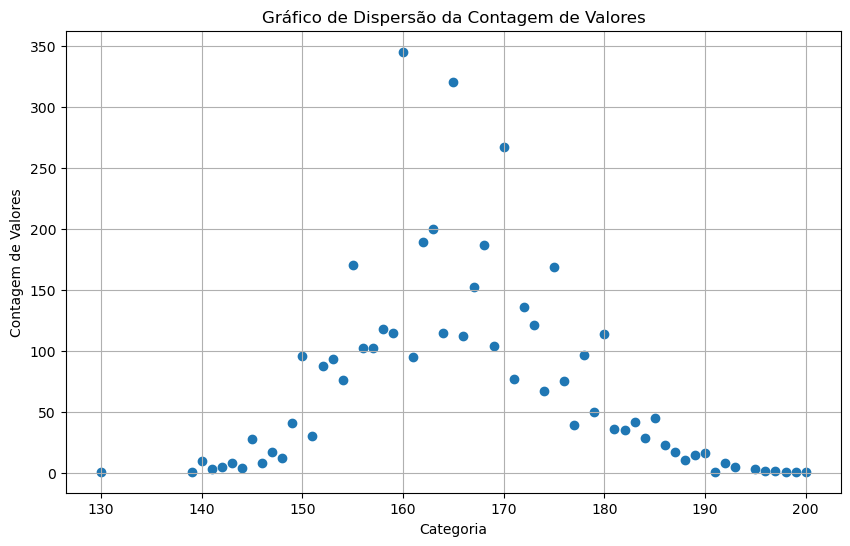

In [64]:
# Gráfico de Dispersão
plt.figure(figsize=(10, 6))
plt.scatter(valores_altura.index, valores_altura.values)

plt.xlabel('Categoria')
plt.ylabel('Contagem de Valores')
plt.title('Gráfico de Dispersão da Contagem de Valores')

# Adiciona linhas de grade para melhor visualização
plt.grid(True)

plt.show()

### Tratando as colunas especificas com dados nulos

In [16]:
# Usando NumPy
std_dev_numpy = np.std(df['E01602'], ddof=1)  # ddof=1 para amostra
print(f"Desvio Padrão (NumPy): {std_dev_numpy:.2f}")

Desvio Padrão (NumPy): 2901.08


In [17]:
df['E01602'].mean()

2100.934351641209

In [18]:
df['E01602'].value_counts()

E01602
998.0      294
2000.0     200
1500.0     191
1000.0     179
1200.0     178
          ... 
1384.0       1
22000.0      1
2380.0       1
2950.0       1
1152.0       1
Name: count, Length: 312, dtype: int64

In [19]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
E01602    1481
E017      1416
D00901     667
P00104     106
P00404     106
dtype: int64


In [20]:
df.shape

(4558, 48)

#### Coluna Salario

In [42]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {2000: 0.4,1500:0.3,1000:0.3}
 
valor_nulo_proporcao(df, 'E01602')

print(df['E01602'].value_counts())

E01602
2000.0     1018
1500.0      717
1000.0      296
998.0       294
1200.0      178
           ... 
1384.0        1
22000.0       1
2380.0        1
2950.0        1
1152.0        1
Name: count, Length: 312, dtype: int64


#### Coluna Horas trabalhadas

In [22]:
df['E017'].value_counts()

E017
40.0    876
44.0    527
48.0    237
30.0    230
20.0    198
       ... 
90.0      1
17.0      1
67.0      1
71.0      1
11.0      1
Name: count, Length: 71, dtype: int64

In [32]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {40:0.4, 48:0.3, 30:0.3}
 
valor_nulo_proporcao(df, 'E017')

print(df['E017'].value_counts())

E017
40.0    1274
20.0     781
48.0     658
44.0     527
30.0     244
        ... 
90.0       1
17.0       1
67.0       1
71.0       1
11.0       1
Name: count, Length: 71, dtype: int64


In [56]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
P00104    106
P00404    106
dtype: int64


### Coluna Nivel Educação

In [55]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {8:0.4, 10:0.3, 12:0.3}
 
valor_nulo_proporcao(df, 'D00901')

print(df['D00901'].value_counts())

D00901
10.0    1962
12.0    1010
7.0      965
8.0      235
13.0     209
11.0     103
14.0      39
3.0       16
15.0      10
4.0        6
2.0        3
Name: count, dtype: int64


#### Coluna Peso E altura

In [85]:
exibir_colunas_com_valores_nulos(df)

Total de valores nulos para as colunas com valores nulos:
Series([], dtype: int64)


In [84]:
# Definindo os valores de substituição e suas proporções
#COLUNA ESCOLARIDADE
replacement_values = {165: 1}
 
valor_nulo_proporcao(df, 'P00404')

print(df['P00404'].value_counts())

P00404
165.0    362
160.0    345
170.0    299
163.0    200
162.0    189
        ... 
139.0      1
130.0      1
199.0      1
198.0      1
200.0      1
Name: count, Length: 62, dtype: int64


In [79]:
df['P00404'].value_counts()

P00404
160.0    345
165.0    320
170.0    267
163.0    200
162.0    189
        ... 
139.0      1
130.0      1
199.0      1
198.0      1
200.0      1
Name: count, Length: 62, dtype: int64

In [86]:
df.to_csv("base_nao_nula.csv")